# Import neccesary library

In [60]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request 
housing = pd.read_csv("data/housing.csv")

# Take a Quick Look at the Data Structure

In [61]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [63]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [64]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [65]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

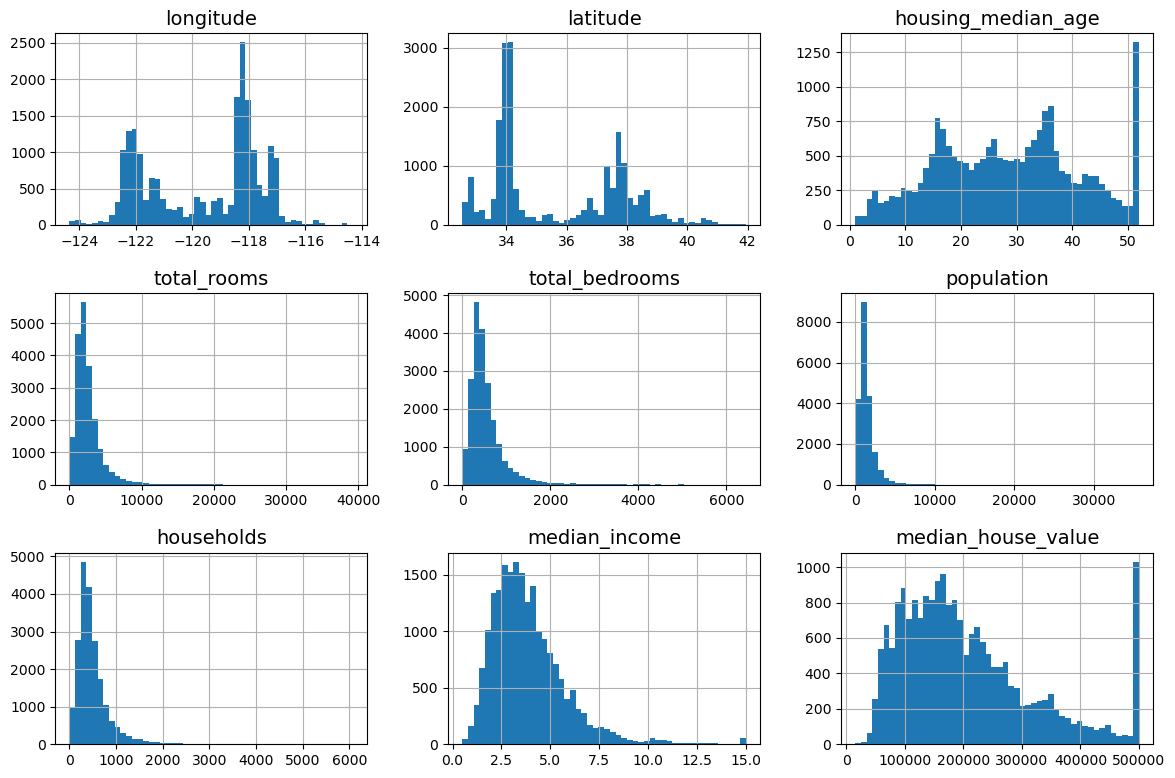

In [66]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

# Create a Test Set

In [67]:
import numpy as np
np.random.seed(42)
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [68]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [69]:
len(test_set)

4128

## Another way to split dataset into train set and test set

In [70]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'len(train_set):{len(train_set)}  len(test_set):{len(test_set)}')

len(train_set):16512  len(test_set):4128


## Suppose that some experts told you that the median income is a very important attribute to predict median housing prices

In [71]:
# - bins=[0., 1.5, 3.0, 4.5, 6., np.inf]=>bings: [0.0 to 1.5], [1.5 to 3.0], [3.0 to 4.5], 
#   [4.5 to 6.0], [6.0 to infinity] (np.inf represents infinity)
# - A new column named income_cat is being created in the housing DataFrame contain 
#   the binned (or categorized) values based on the median_income column
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

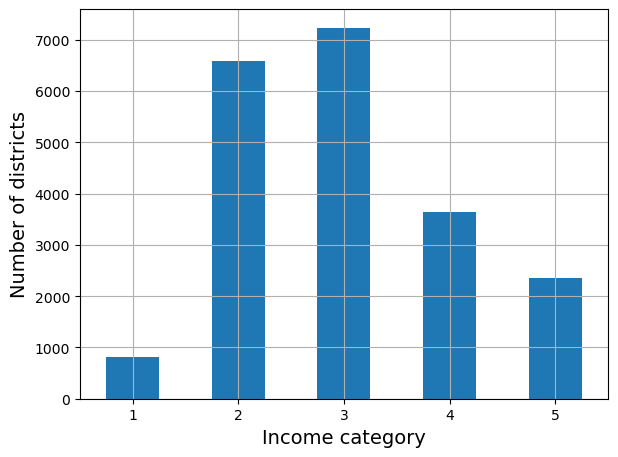

In [72]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

#### Note: split a dataset into training and testing sets in a stratified manner based on the values in the income_cat column. This ensures that the training and test sets have similar distributions of the income_cat categories, which helps improve model performance and evaluation, especially when dealing with imbalanced data

In [73]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [74]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [75]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

# Discover and Visualize the Data to Gain Insights

In [76]:
housing = strat_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


## Visualizing Geographical Data

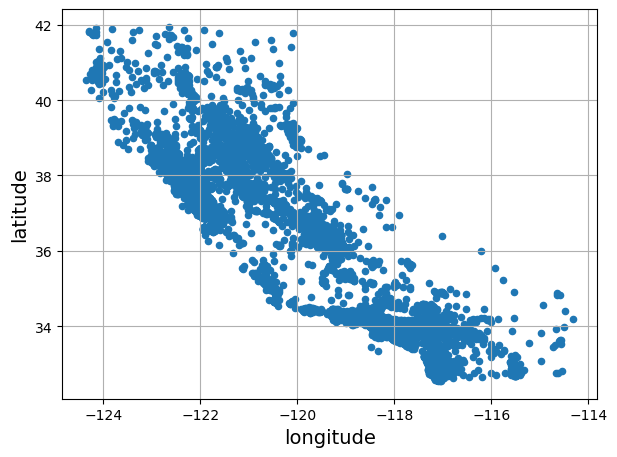

In [77]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

#### This looks like California all right, but other than that it is hard to see any particular pattern

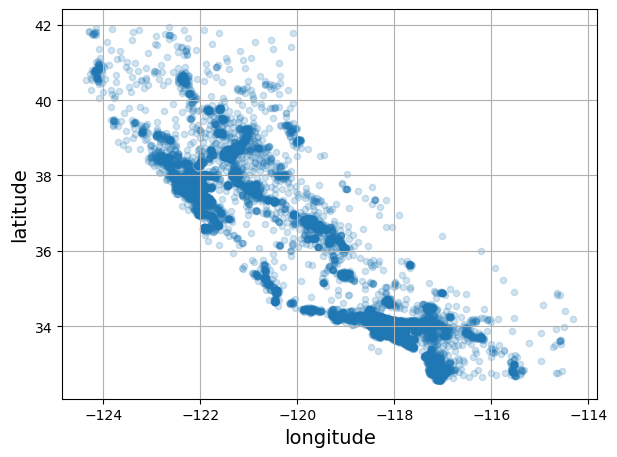

In [78]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

# the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high-density areas in the Central Valley (in particular, around Sacramento and Fresno).

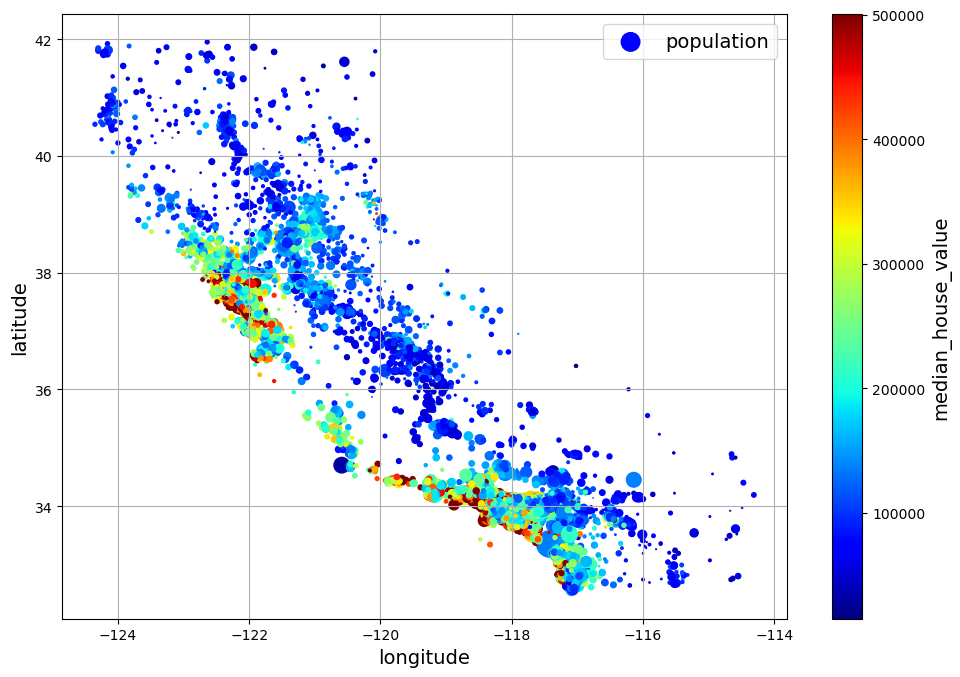

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"] / 100, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

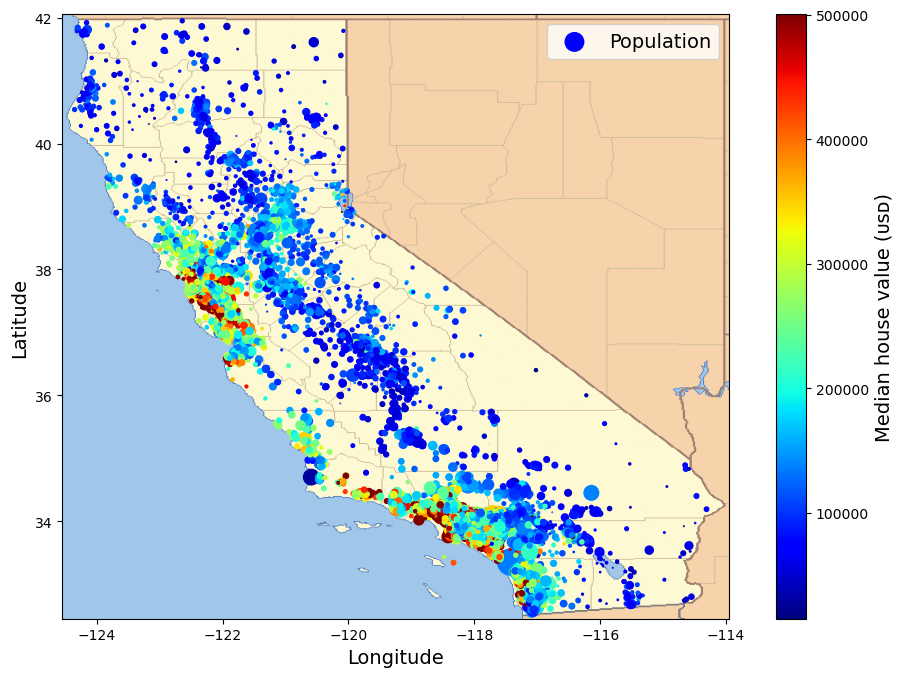

In [80]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
            kind="scatter", x="Longitude", y="Latitude",
            s=housing_renamed["Population"] / 100, label="Population",
            c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations

In [81]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

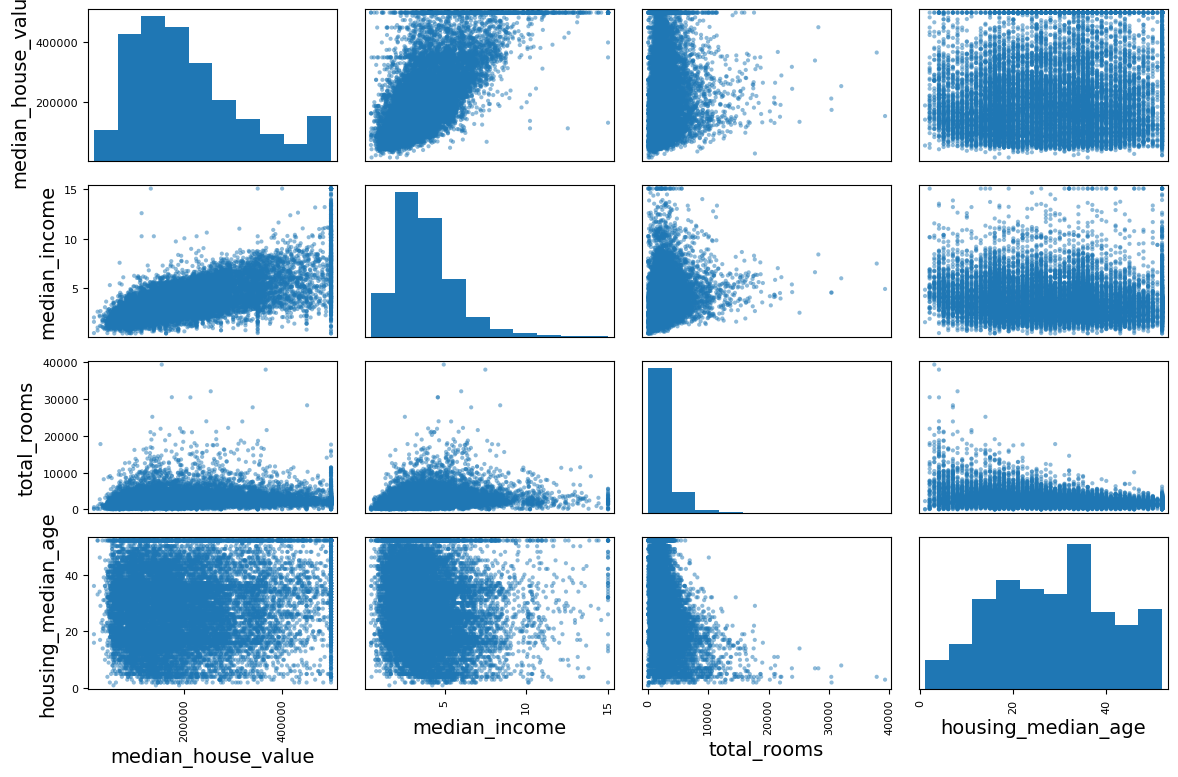

In [82]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

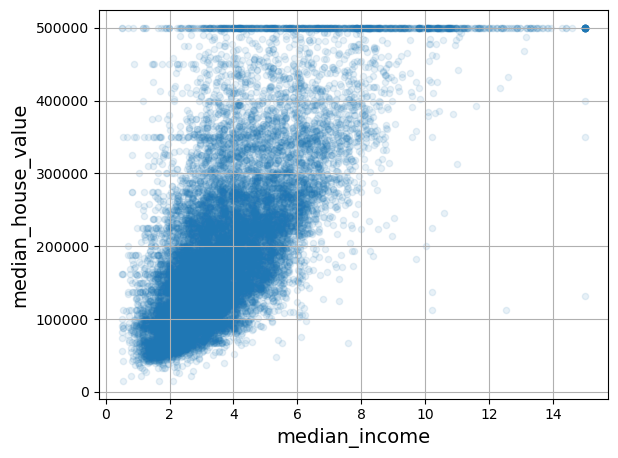

In [83]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

In [84]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [85]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_house       0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
people_per_house     -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_ratio       -0.259952
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [86]:
housing, housing_labels = strat_train_set.drop(columns="median_house_value"), strat_train_set["median_house_value"]

In [87]:
# Alternative way to prepare training set with features and labels
housing = strat_train_set.loc[:, strat_train_set.columns != 'median_house_value']
housing_labels = strat_train_set.loc[:, 'median_house_value']

In [88]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [89]:
housing_labels.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 12655 to 19773
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


# Data Cleaning

In [90]:
housing.dropna(subset=["total_bedrooms"], inplace=True)

/var/folders/92/9k79bv6d7dg0mhlpht2sh4zh0000gn/T/ipykernel_6589/2313661487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.dropna(subset=["total_bedrooms"], inplace=True)


In [91]:
housing.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [92]:
median = housing["total_bedrooms"].median()

In [93]:
housing["total_bedrooms"].fillna(median, inplace=True)

/var/folders/92/9k79bv6d7dg0mhlpht2sh4zh0000gn/T/ipykernel_6589/1782877594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)
/var/folders/92/9k79bv6d7dg0mhlpht2sh4zh0000gn/T/ipykernel_6589/1782877594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["total_bedrooms"].fillna(med

In [94]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [95]:
housing.loc[null_rows_idx].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           0 non-null      float64 
 1   latitude            0 non-null      float64 
 2   housing_median_age  0 non-null      float64 
 3   total_rooms         0 non-null      float64 
 4   total_bedrooms      0 non-null      float64 
 5   population          0 non-null      float64 
 6   households          0 non-null      float64 
 7   median_income       0 non-null      float64 
 8   ocean_proximity     0 non-null      object  
 9   income_cat          0 non-null      category
dtypes: category(1), float64(8), object(1)
memory usage: 212.0+ bytes


In [96]:
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [97]:
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat


In [98]:
housing_option3 = housing.copy()
median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3
housing_option3.loc[null_rows_idx].head()

/var/folders/92/9k79bv6d7dg0mhlpht2sh4zh0000gn/T/ipykernel_6589/467514757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [99]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [100]:
housing_num = housing.select_dtypes(include=[np.number])

In [101]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [102]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [103]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2120.     ,  433.     ,
       1164.     ,  408.     ,    3.54425])

In [104]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2120.     ,  433.     ,
       1164.     ,  408.     ,    3.54425])

In [105]:
X = imputer.transform(housing_num)

In [106]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [107]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [108]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [109]:
imputer.strategy

'median'

In [110]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [111]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)